# Unit 5 Homework 

## 1 相关系数

### t16

$$H_0:r_0=0;H_1:r_0\neq0$$ 
由于$z_r=\frac{1}{2}\ln{\frac{1+r}{1-r}}\sim N(\frac{1}{2} \ln( \frac{1 + r}{1 - r}),\frac{1}{{n - 3}} )$  
$$\text{P}(z\geq (z_r-\frac{1}{2}\ln{\frac{1+r_0}{1-r_0}})\sqrt{n-3})\leq0.025$$
$$\therefore n\geq (\frac{2z_{0.025}}{\ln{(1+r)}-\ln{(1-r)}})^2+3$$

In [93]:
import scipy.stats as stats
import numpy as np

print("z_0.025=", stats.norm.isf(0.025))

z_0.025= 1.9599639845400545


a. r=0.30, $n\geq43.1$, n=44  
b. r=0.25, $n\geq61.9$, n=62  
c. r=0.20, $n\geq96.5$, n=97  
当然这是与r=0进行NHST，无法说明总体的线性强度  
实际上我也试过对r<=0.5进行检验，但是最后的结果确是r越大得到的n越大，这显然是不正确的，原因在于题目给出的r<0.5，会产生负号，这将改变不等号方向，导致错误的检验；而正确的那边是恒成立的，无论n的取值，这没有意义

如果说使用95%CI的下限与0比较，我认为和上面的方法结果是一致的（因为我一开始就是下限和0.5做比较），下面给出证明

$$z_L=z_r-z_{0.025}\cdot \frac{1}{\sqrt{n-3}}$$
$$\therefore r_L=\frac{e^{2z_L}-1}{e^{2z_L}+1}>0$$
$$\Rightarrow z_L>0\Rightarrow n> (\frac{2z_{0.025}}{\ln{(1+r)}-\ln{(1-r)}})^2+3$$

### t19

首先构造数组

In [94]:
rank = np.linspace(1,11,11)
grade = [1,3,1,3,3,6,9,6,6,9,11]

stats.spearmanr(rank, grade)

SignificanceResult(statistic=0.907222105138509, pvalue=0.00011539867905256112)

样本的$\rho$=0.91，是非常大的，说明样本的rank和grade有很强的正相关性  
而$p=1e^{-4}$，说明总体的$\rho$显著不等于0，但无法用p值说明总体显著相关  
还是使用95%CI来说明  
$z_r=\frac{1}{2}\ln{\frac{1+\rho}{1-\rho}}$服从正态分布，z的CI为$z_\rho\pm z_{\alpha/2}\sqrt{\frac{1+\rho^2/2}{n-3}}$  
$$\therefore \rho_L=\frac{e^{2z_{L}}-1}{e^{2z_{L}}+1},\rho_U=\frac{e^{2z_{U}}-1}{e^{2z_{U}}+1}$$
只要$\rho_L\geq0.5$，就能在$\alpha=0.05$的水平上说明总体显著相关  
对于本题，$\rho_L=0.607>0.5$  
故认为总体显著相关

## 2  简单线性回归模型

### Julie Vu, Chapter 6/ 6.26

#### (a)R2 and correlation between lunch and helmet

根据相关系数不随量纲变化的性质和一阶线性回归模型的表示，有
$$r(x,y)=\pm r(\hat{y},y)=\pm \sqrt{R^2}=-0.85$$

#### (b)slope and intercept

$$\text{sploe}\cdot=\frac{n\sum_i{x_iy_i}-\sum_ix_i\sum_iy_i}{n\sum_ix_i^2-(\sum_ix_i)^2}=\frac{\text{COV(x,y)}}{\text{D}(x)}$$
$$\text{intercept}=\bar{y}-\text{sploe}\cdot\bar{x}$$
$$\because r_{x,y}=\frac{cov(x,y)}{\sigma_x\cdot\sigma_y}=\frac{\sum_i(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_i(x_i-\overline{x})^2\sum_i(y_i-\overline{y})^2}}$$
$$\therefore \text{sploe}=r\cdot\frac{SD(y)}{SD(x)}=-0.54,\text{intercept}=55.4\%$$

#### (c)what can intercept say?

结合一阶线性回归模型来看，截距是当自变量为0时的因变量值  
在本题中指的是当 Rate of Receiving a Reduced−Fee Lunch=0时的Rate of Wearing a Helmet  
当自变量没有做随机变量中心化时，截距往往是没有意义的，因为实际情况中自变量往往很少会等于0  
当做了随机变量中心化，截距代表自变量为均值时的因变量值

#### (d)what can slope say?

斜率表示对于总体而言，当自变量增加时，因变量的平均增加值，即某样本自变量比另一个样本自变量大1单位，其因变量比另一个的平均大slope    
在本题中指的是当不同社区之间，lunch观测值增加时，平均而言helmet减少量

#### (e)residual

$$r=(y-\hat{y})^2=(y-b_0-b_1x)^2=3.844\times 10^{-3}$$
残差表示预测模型与样本值的偏离程度，为了消除符号干扰所以平方  
具体而言，残差越小表示模型和样本值越符合

## 3 多元线性回归模型

In [95]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv("Datas/Student_Performance.csv")
data.head()

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SampleQuestionPapersPracticed,PerformanceIndex
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [97]:
data.shape

(10000, 6)

### 3.1 数据可视化

D:\mySoftwares\stem\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


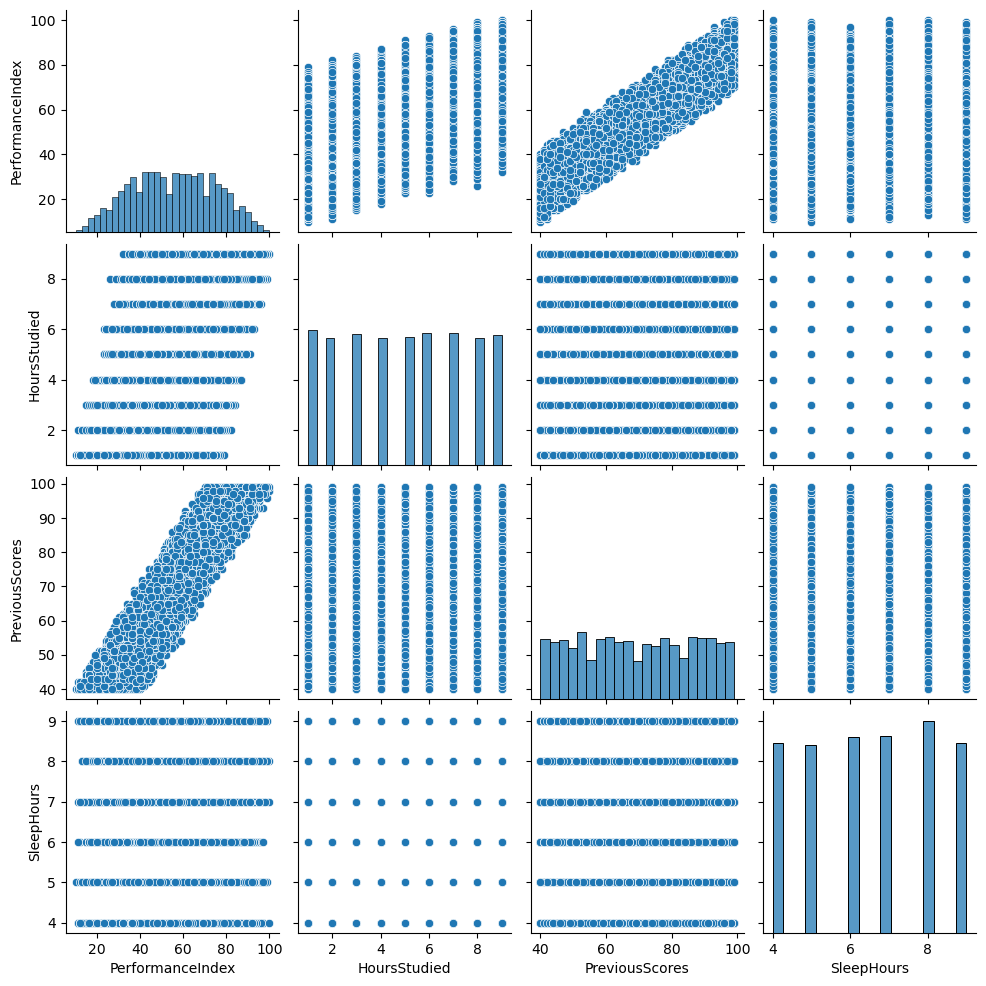

In [98]:
sns.pairplot(data=data, y_vars=["PerformanceIndex", "HoursStudied", "PreviousScores", "SleepHours"], x_vars=["PerformanceIndex", "HoursStudied", "PreviousScores", "SleepHours"])

<Axes: xlabel='SampleQuestionPapersPracticed', ylabel='PerformanceIndex'>

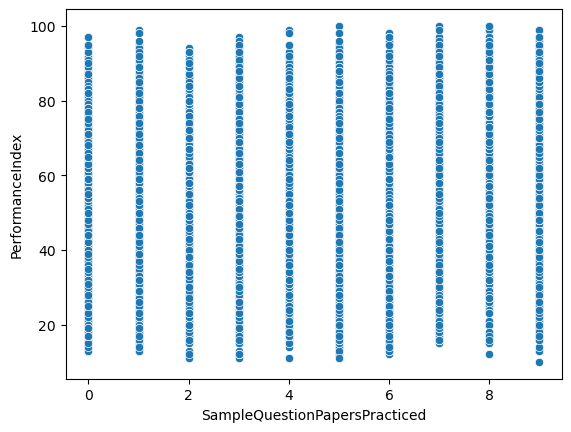

In [99]:
sns.scatterplot(data=data, y="PerformanceIndex", x="SampleQuestionPapersPracticed")

<Axes: xlabel='ExtracurricularActivities', ylabel='PerformanceIndex'>

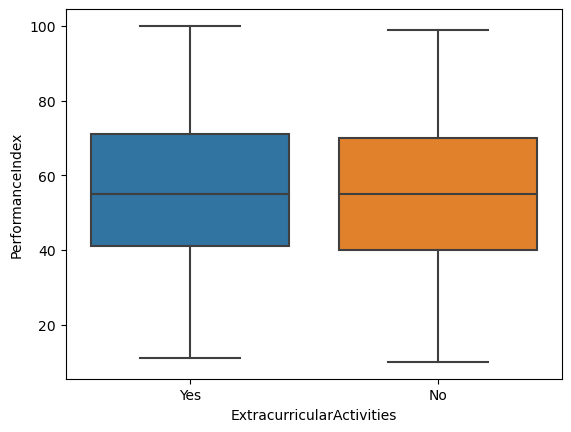

In [100]:
sns.boxplot(data=data, y="PerformanceIndex", x="ExtracurricularActivities")

### 3.2 用线性模型尽可能地预测PerformanceIndex

In [101]:
import statsmodels.formula.api as smf
model = smf.ols("PerformanceIndex~PreviousScores+SleepHours+HoursStudied", data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PerformanceIndex   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.665e+05
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        16:11:05   Log-Likelihood:                -21774.
No. Observations:               10000   AIC:                         4.356e+04
Df Residuals:                    9996   BIC:                         4.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -32.9146      0.127   -258.414      0.000     -33.164     -32.665
PreviousScores     1.0188      0.001    827.342      0.000       1.016       1.021
SleepHours         0.4776      0.013     37.928      0.000       0.453       0.502
HoursStudied       2.8572      0.008    346.406      0.000       2.841       2.873
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.803
Skew:                          -0.002   Prob(JB):                        0.669
Kurtosis:                       3.044   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

经过遍历的尝试，PerformanceIndex~PreviousScores+SleepHours+HoursStudied是最佳的模型

1. $R_{adj}^2和R^2$此时最大，F-value=1.757E5,非常大，对应的p-value=.00
2. 此时的AIC、BIC和Cond.No.也最小，表明模型兼顾简洁性和精准性，对于预测和拟合（解释）都有效
3. 残差分析见下

Text(0.5, 1.0, 'Risiduals by gruops')

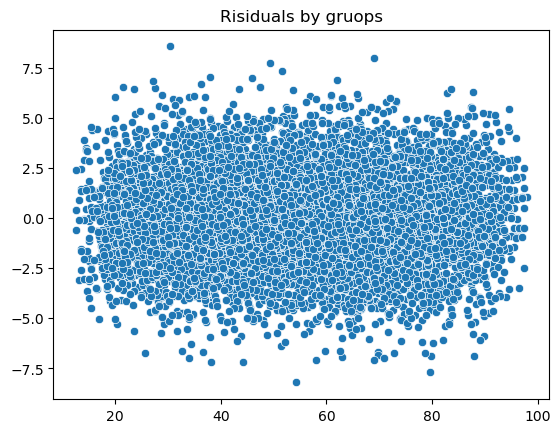

In [102]:
#残差可视化
residuals = results.resid
fitted_value = results.fittedvalues
sns.scatterplot(x=fitted_value,y=residuals)
plt.title("Risiduals by gruops")

Text(0.5, 1.0, 'AllResidualsDistrubtion')

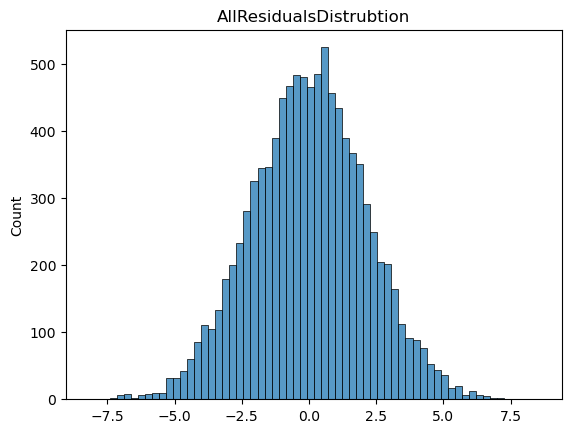

In [103]:
sns.histplot(x=residuals)
plt.title("AllResidualsDistrubtion")

做NHST，p很大，不能认为显著不正态，偏度$\approx$0，峰度$\approx$3，JB检验也说明了正态性较好  
再观察两幅图  
综合以上，可以认为残差的分布非常正态

观察Risiduals by gruops可以发现，不同x对应的残差分布的方差基本相同  
且Durbin-Watson$\approx$2,说明残差不存在自相关性，即方差是基本不变的  
故认为残差**方差齐性好**

Cond.No.却非常大，表明了自变量之间的线性关系很强  
这说明模型的**解释性并不好，但是预测性仍是足够好的**  
但是在pairplot上并没有发现其他三个变量有很强的线性关系

报告如下：  
PreviousScores(b=1.0,t(9998)=827.34,p=.00)、SleepHours(b=0.48,t(9998)=39.93,p=.00)、HoursStudied(b=2.9,t(9998)=346.4,p=.00)显著地预测了PerformanceIndex，纵截距(-32.92,t(9998)=-258.4,p=.00)（可以发现，当n很大时，p会非常显著，在统计上），
这些变量也一定程度上解释了成绩(R2=0.988,F(3,9996)=2.7E05,p=.00)